# MotionPlanning.jl

CME 257 HW3 | Naveen Appiah-Balaji | Julia 0.3.11

MotionPlanning.jl is a Robot motion planning package to solve Kino dynamic motion planning problems using a sampling based motion planner called FMT* (Fast Marching Trees)

## Installation

<p><code> Pkg.clone("https://github.com/schmrlng/MotionPlanning.jl.git") </code></p>

## Reference

- [Fast Marching Tree: a Fast Marching Sampling-Based Method for Optimal Motion Planning in Many Dimensions](http://arxiv.org/abs/1306.3532)
- [Optimal Sampling-Based Motion Planning under Differential Constraints: the Driftless Case](http://arxiv.org/abs/1403.2483)
- [Optimal Sampling-Based Motion Planning under Differential Constraints: the Drift Case with Linear Affine Dynamics](http://arxiv.org/abs/1405.7421)
- [Monte Carlo Motion Planning for Robot Trajectory Optimization Under Uncertainty](http://arxiv.org/abs/1504.08053)

In [1]:
using PyPlot
using MotionPlanning
include(Pkg.dir("MotionPlanning")*"/test/obstaclesets/2D.jl")
include(Pkg.dir("MotionPlanning")*"/test/obstaclesets/ND.jl")

INFO: Loading help data...


### Geometric Planning

In [2]:
statespace = UnitHypercube(2)   # RealVectorMetricSpace, dist = Euclidean
init = [.1, .1]
goal = PointGoal([.9, .9])
collisionchecker = PointRobot2D(ISRR_POLY_WITH_SPIKE)
P = MPProblem(statespace, init, goal, collisionchecker);

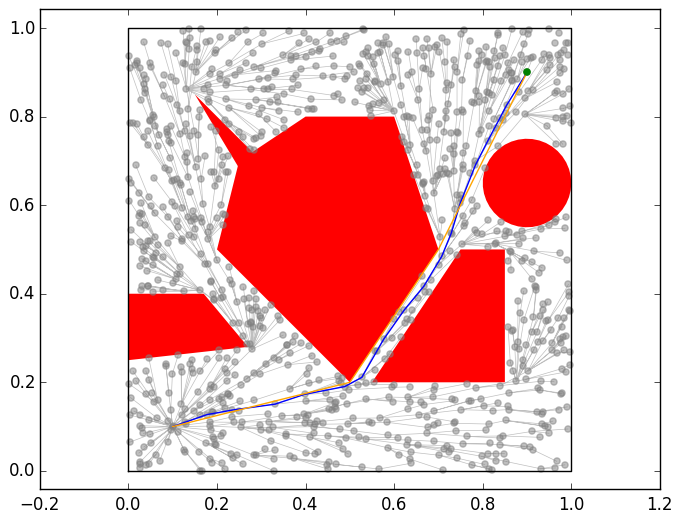

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x11575bad0>

In [3]:
fmtstar!(P, 1000, connections = :R, rm = 1.5)
adaptive_shortcut!(P)
plot(P, meta=true, smoothed=true)

### Double Integrator Planning

In [4]:
statespace = DoubleIntegrator(2, vmax = 0.5)   # LinearQuadraticStateSpace, dist = time + quadratic control cost
init = [.1, .1, 0., 0.]
goal = PointGoal([.9, .9, 0., 0.])
collisionchecker = PointRobot2D(ISRR_POLY_WITH_SPIKE)
P = MPProblem(statespace, init, goal, collisionchecker);

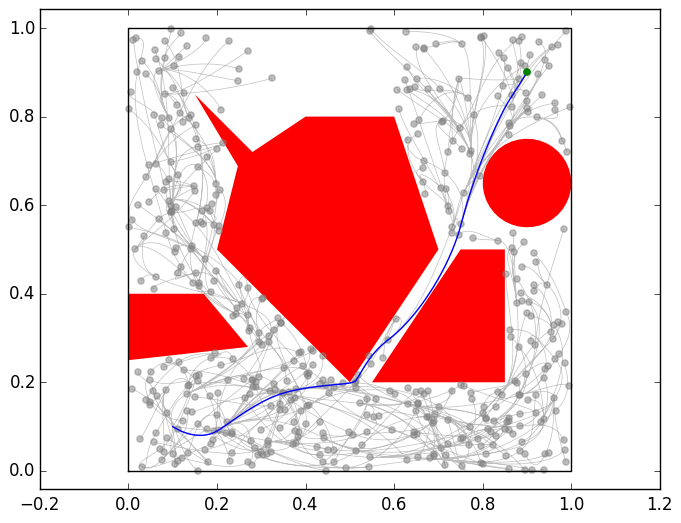

false

In [5]:
fmtstar!(P, 1000, connections = :R, r = 1.)
plot(P, meta=true)

### Reeds-Shepp Planning

In [6]:
statespace = ReedsSheppStateSpace(.2)   # ReedsSheppStateSpace, dist = arc length
init = RSState(.1,.1,0.)
goal = PointGoal([.9,.9])
collisionchecker = PointRobot2D(ISRR_POLY_WITH_SPIKE)
P = MPProblem(statespace, init, goal, collisionchecker);

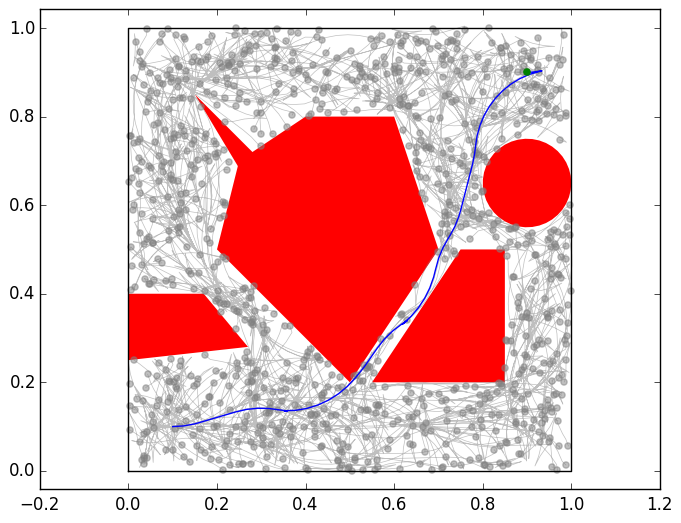

false

In [7]:
fmtstar!(P, 1000, connections = :R, r = .3)
plot(P, meta=true)